### Task 1: Least Squares Regression

In [1]:
from sklearn.datasets import load_boston
import numpy as np
from numpy import linalg as LA


data, labels = load_boston(return_X_y = True)
labels = labels.reshape((len(labels), 1))

#print(data.shape) # 506 by 13
#print(labels.shape) # 506 by 1

concat_ones = np.ones((506,1))

data = np.column_stack((data, concat_ones))
#print(data.shape) # 506 by 14

In [20]:
# Partitioning data matrix X into 5 folds
X_folds = np.array([data[:101], data[101:202], data[202:303], data[303:404], data[404:]])

# Partitioning labels into 5 folds
label_fold0 = labels[0:101, :]
label_fold1 = labels[101:202, :]
label_fold2 = labels[202:303,:]
label_fold3 = labels[303:404, :]
label_fold4 = labels[404:,:]
labels_folds = np.array([label_fold0, label_fold1, label_fold2, label_fold3, label_fold4])


# Least Squares find w tilde
def W_Tilde(X, Y):
    w = (LA.inv(X.T @ X)) @ (X.T @ Y)
    return w

# Now Predict Output
def Predict(X, w):
    output = X @ w
    #output = (w.T).dot(X)
    return output

# Evaluate predictions
def Evaluate(Ytest, Ylabels):
    summation = 0;
    N = len(Ytest)
    for i in range(0, N):
        summation += ((Ytest[i] - Ylabels[i]) ** 2)
    avg_accuracy = summation / N
    return avg_accuracy

# List of prediction errors
ls_errors = []

##### Using folds 0, 1, 2, 3 as training | fold 4 as test 

In [3]:
# Using folds 0-3 as training data, labels
train_X_0123 = np.c_[X_folds[0].T, X_folds[1].T, X_folds[2].T, X_folds[3].T].T
train_labels_0123 = np.c_[labels_folds[0].T, labels_folds[1].T, labels_folds[2].T, labels_folds[3].T].T

# Using fold 4 as test data, labels
test_X_4 = X_folds[4]
test_labels_4 = labels_folds[4]

# Producing w tilde from training data, labels
wtilde_cv0 = W_Tilde(train_X_0123, train_labels_0123)

# Producing output using learned w tilde
y_cv0 = Predict(test_X_4, wtilde_cv0)

# Accuracy for Iteration # 1 of cross validation
eval_0 = Evaluate(y_cv0, test_labels_4)
ls_errors.append(eval_0)
print("First cross validation iteration, prediction error = ", eval_0)

First cross validation iteration, prediction error =  [33.07562649]


##### Using folds 0, 1, 2, 4 as training | fold 3 as test 

In [4]:
# Using folds 0-2, 4 as training data, labels
train_X_0124 = np.c_[X_folds[0].T, X_folds[1].T, X_folds[2].T, X_folds[4].T].T
train_labels_0124 = np.c_[labels_folds[0].T, labels_folds[1].T, labels_folds[2].T, labels_folds[4].T].T

# Using fold 3 as test data, labels
test_X_3 = X_folds[3]
test_labels_3 = labels_folds[3]

# Producing w tilde from training data, labels
wtilde_cv1 = W_Tilde(train_X_0124, train_labels_0124)

# Producing output using learned w tilde
y_cv1 = Predict(test_X_3, wtilde_cv1)

# Accuracy for Iteration # 2 of cross validation
eval_1 = Evaluate(y_cv1, test_labels_3)
ls_errors.append(eval_1)
print("Second cross validation iteration, prediction error = ", eval_1)

Second cross validation iteration, prediction error =  [80.21271392]


##### Using folds 0,1,3,4 as training | fold 2 as test 

In [5]:
train_X_0134 = np.c_[X_folds[0].T, X_folds[1].T, X_folds[3].T, X_folds[4].T].T
train_labels_0134 = np.c_[labels_folds[0].T, labels_folds[1].T, labels_folds[3].T, labels_folds[4].T].T

# Using fold 2 as test data, labels
test_X_2 = X_folds[2]
test_labels_2 = labels_folds[2]

# Producing w tilde from training data, labels
wtilde_cv2 = W_Tilde(train_X_0134, train_labels_0134)

# Producing output using learned w tilde
y_cv2 = Predict(test_X_2, wtilde_cv2)

# Accuracy for Iteration # 3 of cross validation
eval_2 = Evaluate(y_cv2, test_labels_2)
ls_errors.append(eval_2)
print("Third cross validation iteration, prediction error = ", eval_2)

Third cross validation iteration, prediction error =  [33.88597899]


##### Using folds 0, 2, 3, 4 as training | fold 1 as test 

In [6]:
train_X_0234 = np.c_[X_folds[0].T, X_folds[2].T, X_folds[3].T, X_folds[4].T].T
train_labels_0234 = np.c_[labels_folds[0].T, labels_folds[2].T, labels_folds[3].T, labels_folds[4].T].T

# Using fold 1 as test data, labels
test_X_1 = X_folds[1]
test_labels_1 = labels_folds[1]

# Producing w tilde from training data, labels
wtilde_cv3 = W_Tilde(train_X_0234, train_labels_0234)

# Producing output using learned w tilde
y_cv3 = Predict(test_X_1, wtilde_cv3)

# Accuracy for Iteration # 4 of cross validation
eval_3 = Evaluate(y_cv3, test_labels_1)
ls_errors.append(eval_3)
print("Fourth cross validation iteration, prediction error = ", eval_3)

Fourth cross validation iteration, prediction error =  [25.85742277]


##### Using folds 1, 2, 3, 4 as training | fold 0 as test 

In [7]:
train_X_1234 = np.c_[X_folds[1].T, X_folds[2].T, X_folds[3].T, X_folds[4].T].T
train_labels_1234 = np.c_[labels_folds[1].T, labels_folds[2].T, labels_folds[3].T, labels_folds[4].T].T

# Using fold 0 as test data, labels
test_X_0 = X_folds[0]
test_labels_0 = labels_folds[0]

# Producing w tilde from training data, labels
wtilde_cv4 = W_Tilde(train_X_1234, train_labels_1234)

# Producing output using learned w tilde
y_cv4 = Predict(test_X_0, wtilde_cv4)

# Accuracy for Iteration # 5 of cross validation
eval_4 = Evaluate(y_cv4, test_labels_0)
ls_errors.append(eval_4)
print("Fifth cross validation iteration, prediction error = ", eval_4)

Fifth cross validation iteration, prediction error =  [12.59521025]


##### Average prediction error over k = 5 cross validation

In [8]:
avg = np.mean(ls_errors)
print("Average prediction error = ", avg)

Average prediction error =  37.125390481939526


##### Using Smallest Prediction Error Training and Test Folds: Plotting Measured versus Predicted

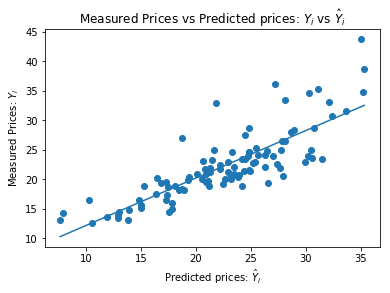

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1)

measured = test_labels_0
predicted = y_cv4
measured = measured.ravel()
predicted = predicted.ravel()

plt.scatter(predicted, measured)
plt.ylabel("Measured Prices: $Y_i$")
plt.xlabel("Predicted prices: $\hat{Y}_i$")
plt.title("Measured Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.plot(np.unique(predicted), np.poly1d(np.polyfit(predicted, measured, 1))(np.unique(predicted)))

### Task 2: Ridge Regression

In [10]:
# Discretizing lambda values from 0 to 12
m_lambda = [1, 3, 6, 9, 12]
m_lambda1 = []
m_lambda3 = []
m_lambda6 = []
m_lambda9 = []
m_lambda12 = []
untouched_data = []
untouched_labels = []

# Ridge Regression Solution
def Ridge_WTilde(X, Y, lambda_val):
    test = np.identity(len(X_folds[0].T))
    wtilde = LA.inv((X.T @ X) + (lambda_val * np.identity(len(X.T)))) @ (X.T @ Y)
    return wtilde

##### Finding Best $\lambda$

In [11]:
def FindLambdaError(in1, in2, in3, in_test, leave, lam_val):
    # Train
    train = np.c_[X_folds[in1 - 1].T, X_folds[in2 - 1].T, X_folds[in3 - 1].T].T
    labels = np.c_[labels_folds[in1 - 1].T, labels_folds[in2 - 1].T, labels_folds[in3 - 1].T].T
    
    # Test
    test = X_folds[in_test - 1]
    test_labels = labels_folds[in_test - 1]
    
    # Untouched
    untouched_dat =  X_folds[leave - 1]
    untouched_data.append(untouched_dat)
    untouched_lab = labels_folds[leave - 1]
    untouched_labels.append(untouched_lab)
    
    # Produce w tilde
    w = Ridge_WTilde(train, labels, lam_val)
    # Predict
    output = Predict(test, w)
    # Error
    err = Evaluate(output, test_labels)
    
    return err

In [12]:
# Lambda = 1

# Iteration 1: Train on folds 1, 2, and 3; validate (test) on fold 4; leave fold 5 untouched
lam1_it1 = FindLambdaError(1,2,3,4,5,m_lambda[0])
m_lambda1.append(lam1_it1)

# Iteration 2: Train on folds 2, 3, and 4; validate (test) on fold 5; leave fold 1 untouched
lam1_it2 = FindLambdaError(2,3,4,5,1,m_lambda[0])
m_lambda1.append(lam1_it2)

# Iteration 3: Train on folds 3, 4, and 5; validate (test) on fold 1; leave fold 2 untouched
lam1_it3 = FindLambdaError(3,4,5,1,2,m_lambda[0])
m_lambda1.append(lam1_it3)

# Iteration 4: Train on folds 4, 5, and 1; validate (test) on fold 2; leave fold 3 untouched
lam1_it4 = FindLambdaError(4,5,1,2,3,m_lambda[0])
m_lambda1.append(lam1_it4)

# Iteration 5: Train on folds 5, 1, and 2; validate (test) on fold 3; leave fold 4 untouched
lam1_it5 = FindLambdaError(5,1,2,3,4,m_lambda[0])
m_lambda1.append(lam1_it5)

print("Lambda = 1 : Average Prediction Error = ", np.mean(m_lambda1))

Lambda = 1 : Average Prediction Error =  60.27964622920531


In [13]:
# Lambda = 3

# Iteration 1: Train on folds 1, 2, and 3; validate (test) on fold 4; leave fold 5 untouched
lam3_it1 = FindLambdaError(1,2,3,4,5,m_lambda[1])
m_lambda3.append(lam3_it1)

# Iteration 2: Train on folds 2, 3, and 4; validate (test) on fold 5; leave fold 1 untouched
lam3_it2 = FindLambdaError(2,3,4,5,1,m_lambda[1])
m_lambda3.append(lam3_it2)

# Iteration 3: Train on folds 3, 4, and 5; validate (test) on fold 1; leave fold 2 untouched
lam3_it3 = FindLambdaError(3,4,5,1,2,m_lambda[1])
m_lambda3.append(lam3_it3)

# Iteration 4: Train on folds 4, 5, and 1; validate (test) on fold 2; leave fold 3 untouched
lam3_it4 = FindLambdaError(4,5,1,2,3,m_lambda[1])
m_lambda3.append(lam3_it4)

# Iteration 5: Train on folds 5, 1, and 2; validate (test) on fold 3; leave fold 4 untouched
lam3_it5 = FindLambdaError(5,1,2,3,4,m_lambda[1])
m_lambda3.append(lam3_it5)

print("Lambda = 3 : Average Prediction Error = ", np.mean(m_lambda3))

Lambda = 3 : Average Prediction Error =  49.11504480990901


In [14]:
# Lambda = 6

# Iteration 1: Train on folds 1, 2, and 3; validate (test) on fold 4; leave fold 5 untouched
lam6_it1 = FindLambdaError(1,2,3,4,5,m_lambda[2])
m_lambda6.append(lam6_it1)

# Iteration 2: Train on folds 2, 3, and 4; validate (test) on fold 5; leave fold 1 untouched
lam6_it2 = FindLambdaError(2,3,4,5,1,m_lambda[2])
m_lambda6.append(lam6_it2)

# Iteration 3: Train on folds 3, 4, and 5; validate (test) on fold 1; leave fold 2 untouched
lam6_it3 = FindLambdaError(3,4,5,1,2,m_lambda[2])
m_lambda6.append(lam6_it3)

# Iteration 4: Train on folds 4, 5, and 1; validate (test) on fold 2; leave fold 3 untouched
lam6_it4 = FindLambdaError(4,5,1,2,3,m_lambda[2])
m_lambda6.append(lam6_it4)

# Iteration 5: Train on folds 5, 1, and 2; validate (test) on fold 3; leave fold 4 untouched
lam6_it5 = FindLambdaError(5,1,2,3,4,m_lambda[2])
m_lambda6.append(lam6_it5)

print("Lambda = 6 : Average Prediction Error = ", np.mean(m_lambda6))

Lambda = 6 : Average Prediction Error =  46.74134002722932


In [15]:
# Lambda = 9

# Iteration 1: Train on folds 1, 2, and 3; validate (test) on fold 4; leave fold 5 untouched
lam9_it1 = FindLambdaError(1,2,3,4,5,m_lambda[3])
m_lambda9.append(lam9_it1)

# Iteration 2: Train on folds 2, 3, and 4; validate (test) on fold 5; leave fold 1 untouched
lam9_it2 = FindLambdaError(2,3,4,5,1,m_lambda[3])
m_lambda9.append(lam9_it2)

# Iteration 3: Train on folds 3, 4, and 5; validate (test) on fold 1; leave fold 2 untouched
lam9_it3 = FindLambdaError(3,4,5,1,2,m_lambda[3])
m_lambda9.append(lam9_it3)

# Iteration 4: Train on folds 4, 5, and 1; validate (test) on fold 2; leave fold 3 untouched
lam9_it4 = FindLambdaError(4,5,1,2,3,m_lambda[3])
m_lambda9.append(lam9_it4)

# Iteration 5: Train on folds 5, 1, and 2; validate (test) on fold 3; leave fold 4 untouched
lam9_it5 = FindLambdaError(5,1,2,3,4,m_lambda[3])
m_lambda9.append(lam9_it5)

print("Lambda = 9 : Average Prediction Error = ", np.mean(m_lambda9))

Lambda = 9 : Average Prediction Error =  46.87458207561587


In [16]:
# Lambda = 12

# Iteration 1: Train on folds 1, 2, and 3; validate (test) on fold 4; leave fold 5 untouched
lam12_it1 = FindLambdaError(1,2,3,4,5,m_lambda[4])
m_lambda12.append(lam12_it1)

# Iteration 2: Train on folds 2, 3, and 4; validate (test) on fold 5; leave fold 1 untouched
lam12_it2 = FindLambdaError(2,3,4,5,1,m_lambda[4])
m_lambda12.append(lam12_it2)

# Iteration 3: Train on folds 3, 4, and 5; validate (test) on fold 1; leave fold 2 untouched
lam12_it3 = FindLambdaError(3,4,5,1,2,m_lambda[4])
m_lambda12.append(lam12_it3)

# Iteration 4: Train on folds 4, 5, and 1; validate (test) on fold 2; leave fold 3 untouched
lam12_it4 = FindLambdaError(4,5,1,2,3,m_lambda[4])
m_lambda12.append(lam12_it4)

# Iteration 5: Train on folds 5, 1, and 2; validate (test) on fold 3; leave fold 4 untouched
lam12_it5 = FindLambdaError(5,1,2,3,4,m_lambda[4])
m_lambda12.append(lam12_it5)

print("Lambda = 12 : Average Prediction Error = ", np.mean(m_lambda12))

Lambda = 12 : Average Prediction Error =  47.65323227281052


In [18]:
# Using best lambda
def FindRR_Error(in1,in2,in3,in4,in_test, lam_val):
    # Train
    train = np.c_[X_folds[in1 - 1].T, X_folds[in2 - 1].T, X_folds[in3 - 1].T, X_folds[in4 - 1].T].T
    labels = np.c_[labels_folds[in1 - 1].T, labels_folds[in2 - 1].T, labels_folds[in3 - 1].T, labels_folds[in4 - 1].T].T
    
    # Test
    test = X_folds[in_test - 1]
    test_labels = labels_folds[in_test - 1]
    
    # Produce w tilde
    w = Ridge_WTilde(train, labels, lam_val)
    # Predict
    output = Predict(test, w)
    # Error
    err = Evaluate(output, test_labels)
    return err

##### Now using best $\lambda$  = 6 

In [19]:
best_lambda = m_lambda[2]
rr_errors = []

# Iteration 1: Train on folds 1, 2, 3, and 4; test on fold 5
it1_err = FindRR_Error(1,2,3,4,5,best_lambda)
rr_errors.append(it1_err)

# Iteration 2: Train on folds 2, 3, 4, and 5; test on fold 1
it2_err = FindRR_Error(2,3,4,5,1,best_lambda)
rr_errors.append(it2_err)

# Iteration 3: Train on folds 3, 4, 5, and 1; test on fold 2
it3_err = FindRR_Error(3,4,5,1,2,best_lambda)
rr_errors.append(it3_err)

# Iteration 4: Train on folds 4, 5, 1, and 2; test on fold 3
it4_err = FindRR_Error(4,5,1,2,3,best_lambda)
rr_errors.append(it4_err)

# Iteration 5: Train on folds 5, 1, 2, and 3; test on fold 4
it5_err = FindRR_Error(5,1,2,3,4,best_lambda)
rr_errors.append(it5_err)

print("Final RR Average Prediction Error = ", np.mean(rr_errors))

Final RR Average Prediction Error =  32.70430201424554
